### 1. ELEMENTARNE FUNKCIJE

In [1]:
import numpy as np
from sympy import *
from sympy.plotting import plot as symplot
init_printing()

In [2]:
x, eps = symbols("x, epsilon")
f = 1/(x**2*(sinh(1/x)**2))

In [3]:
lim1 = Limit(f,x,0)
display(lim1.doit())

In [4]:
integral = integrate(f, (x, -eps, +eps))
lim2 = Limit(integral, eps, 0)
display(lim2.doit())

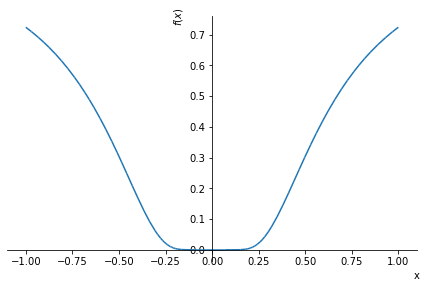

In [5]:
plot(f, (x, -1, 1), ylabel='$f(x)$')

In [6]:
f = 1/(x**2*sinh(1/x))
lim3 = Limit(f,x,0)
display(lim3.doit())
integral = integrate(f, (x, -eps, +eps))
lim4 = Limit(integral, eps, 0)
display(lim4.doit())

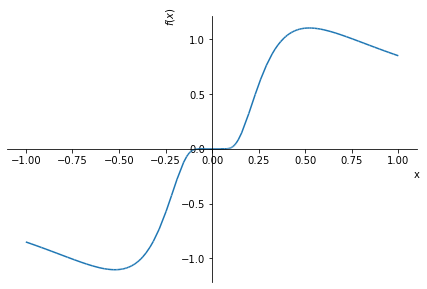

In [7]:
plot(f, (x, -1, 1), ylabel='$f(x)$')

### 2. I INTEGRALI SU FUNKCIJE

Zadatak je pronaći globalni minimum i maksimum, kao i točku infleksije najbližu ishodištu za funkciju:
$f(x) = \frac{\int_0^x e^{\cos y}dy}{\int_0^x e^{\sin y}dy}$

In [8]:
from scipy.integrate import quad
from scipy.optimize import minimize, brentq
from matplotlib import pyplot as plt

In [9]:
x,y = symbols("x,y", positive = True)
f1 = lambda y : np.exp(np.cos(y))
f2 = lambda y : np.exp(np.sin(y))
func = lambda x : quad(f1, 0, x)[0] / quad(f2, 0, x)[0]
func1 = lambda x : -quad(f1, 0, x)[0] / quad(f2, 0, x)[0]

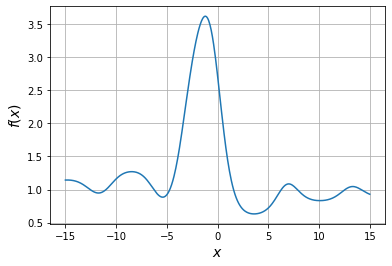

In [10]:
t = np.linspace(-15, 15, 500)
y = [func(ti) for ti in t]
plt.plot(t, y)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$f(x)$', fontsize=14)
plt.grid()

In [11]:
# iz grafa se vidi približna vrijednost maksimuma i minimuma funkcije, pa pri pozivu funkcije scipy.integrate.optimize
# kao drugi argument, tj. procjenu za maksimum stavljamo vrijednost -1, a procjenu za minimum 3

minimum = minimize(func, 3)
maksimum = minimize(func1, -1)
print("Globalni minimum funkcije f(x) je (", minimum.x[0], ",", func(minimum.x[0]), ")")
print("Globalni maksimum funkcije f(x) je (", maksimum.x[0], ",", func(maksimum.x[0]), ")")

Globalni minimum funkcije f(x) je ( 3.595641078584663 , 0.6312388330198981 )
Globalni maksimum funkcije f(x) je ( -1.212849342283485 , 3.621796742443679 )


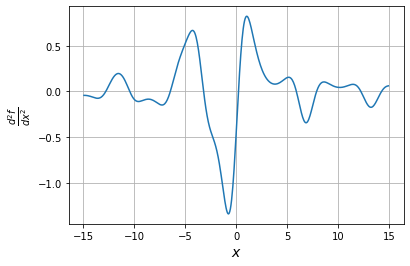

In [12]:
# numerički računamo drugu derivaciju funkcije f(x)
dy1 = np.diff(y,1)
dx1 = np.diff(t,1)
df1 = dy1/dx1
t1 = 0.5*(t[:-1]+t[1:])

df2 = np.diff(df1,1)/np.diff(t1,1)
t2 = 0.5*(t1[:-1]+t1[1:])

plt.figure(2)
plt.plot(t2, df2)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$\\frac{d^2f}{dx^2}$', fontsize=14)
plt.grid()

In [13]:
indeksi = np.where(np.diff(np.sign(df2))!=0)
x_infleksije = t2[indeksi]
udaljenosti = [np.sqrt(func(x)**2+x**2) for x in x_infleksije]
min_infleksija = x_infleksije[udaljenosti.index(min(udaljenosti))]
print("Točka infleksije najbliža ishodištu je (", min_infleksija, ",", func(min_infleksija), ")")

Točka infleksije najbliža ishodištu je ( 0.21042084168336617 , 2.4254476158884546 )


### 3. PROSJEK

In [14]:
x, y, z = symbols("x,y,z")

int1 = lambda y : np.exp(np.cos(y))
int2 = lambda y : np.exp(np.sin(y))
# primitivna funkcija funkcije f(x):
F = lambda x : quad(int2, 0, quad(int1, 0, x)[0])[0] / quad(int1, 0, quad(int2, 0, x)[0])[0]

In [15]:
for i in range(1, 1000):
    Li = i*1e-3
    prosjek = (F(Li)-F(-Li))/(2*Li)
    if abs(prosjek - Li) < 1e-3:
        print("L =", Li)
        break

L = 0.637
